# TP2: Semantic Networks - Detailed Solution
This Jupyter Notebook provides detailed solutions for each step in the TP2 on semantic networks.
Using Python, we utilize `spaCy` for natural language processing, `NetworkX` for network creation and analysis, 
and `matplotlib` for visualization. Follow along to understand each part of building and exploring a semantic network.


## Part 1: Environment Setup and Network Creation

In this part, we will install and import the required libraries, load a language model, define our text input, 
and extract entities and relationships to construct a semantic network.


### Step 1: Install Necessary Libraries
If the necessary libraries (`spaCy`, `NetworkX`, and `matplotlib`) are not installed, run the following commands:

```bash
pip install spacy networkx matplotlib
python -m spacy download en_core_web_sm
```


In [1]:
# Step 2: Import Libraries
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Load spaCy language model
nlp = spacy.load("en_core_web_sm")


### Step 3: Define Text Input
We will define a sample text to extract entities and relationships, which we will use to build our semantic network.


In [2]:
text = """
Google, headquartered in Mountain View, unveiled the new Android phone at the Consumer Electronic Show.
Sundar Pichai is the CEO of Google. Artificial Intelligence and Machine Learning are important aspects of Google's 
technology development.
"""
doc = nlp(text)



In [3]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Google ORG
Mountain View GPE
Android ORG
the Consumer Electronic Show FAC
Sundar Pichai PERSON
Google ORG
Artificial Intelligence and Machine Learning ORG
Google ORG


In [4]:
# Load a larger spaCy model
nlp = spacy.load("en_core_web_md")  # Or "en_core_web_lg" if available


### Step 4: Extract Entities and Create Relationships
Using `spaCy`, we will extract entities and identify relationships between entities that co-occur in the same sentence.


In [5]:
# Initialize lists for entities and relationships
entities = []
relations = []

# Extract entities and relationships
for sentence in doc.sents:
    ents_in_sentence = [ent.text for ent in sentence.ents]
    entities.extend(ents_in_sentence)
    for ent1, ent2 in combinations(ents_in_sentence, 2):
        relations.append((ent1, ent2))

# Remove duplicates
entities = list(set(entities))
relations = list(set(relations))

# Print to check extracted entities and relationships
print("Entities:", entities)
print("Relationships:", relations)

# Create the graph
G = nx.Graph()
G.add_nodes_from(entities)
G.add_edges_from(relations)

# Verify the graph structure
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Entities: ['Artificial Intelligence and Machine Learning', 'Google', 'Android', 'the Consumer Electronic Show', 'Mountain View', 'Sundar Pichai']
Relationships: [('Google', 'the Consumer Electronic Show'), ('Mountain View', 'the Consumer Electronic Show'), ('Sundar Pichai', 'Google'), ('Artificial Intelligence and Machine Learning', 'Google'), ('Google', 'Mountain View'), ('Mountain View', 'Android'), ('Google', 'Android'), ('Android', 'the Consumer Electronic Show')]
Number of nodes: 6
Number of edges: 8


### Step 5: Create the Semantic Network Graph
Using `NetworkX`, we will create an undirected graph where nodes represent entities and edges represent relationships.


In [6]:
# Initialize an undirected graph
G = nx.Graph()

# Add entities as nodes
G.add_nodes_from(entities)

# Add relationships as edges
G.add_edges_from(relations)

# Display basic information about the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes))
print("Edges:", list(G.edges))


Number of nodes: 6
Number of edges: 8
Nodes: ['Artificial Intelligence and Machine Learning', 'Google', 'Android', 'the Consumer Electronic Show', 'Mountain View', 'Sundar Pichai']
Edges: [('Artificial Intelligence and Machine Learning', 'Google'), ('Google', 'the Consumer Electronic Show'), ('Google', 'Sundar Pichai'), ('Google', 'Mountain View'), ('Google', 'Android'), ('Android', 'Mountain View'), ('Android', 'the Consumer Electronic Show'), ('the Consumer Electronic Show', 'Mountain View')]


### Step 6: Visualize the Semantic Network
We will use `matplotlib` to visualize the semantic network, displaying nodes and edges to identify central nodes and clusters.


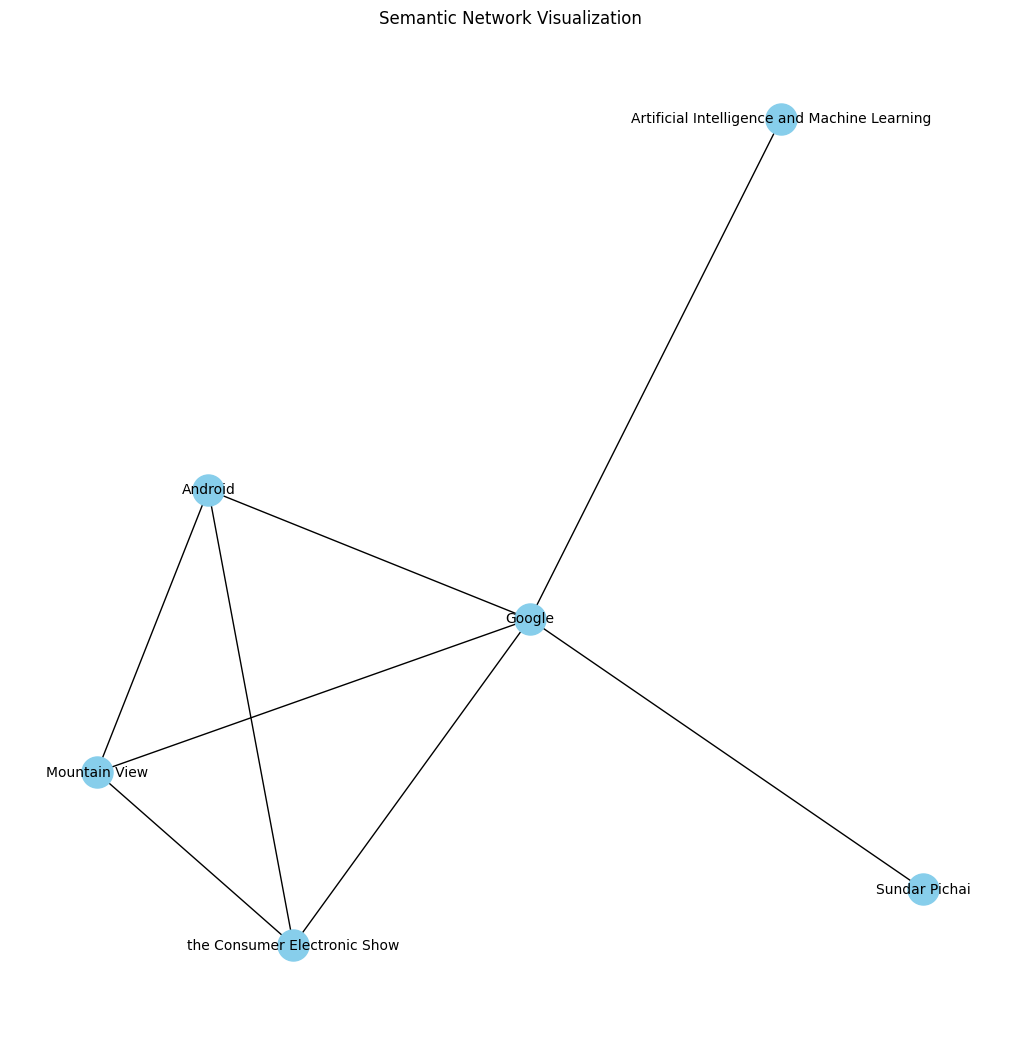

In [7]:
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=500, node_color="skyblue", font_size=10)
plt.title("Semantic Network Visualization")
plt.show()


## Part 2: Advanced Network Exploration

In this section, we explore additional steps to enhance our semantic network analysis by using a larger corpus, 
advanced relationship detection methods, similarity measures, and interactive visualizations.


### Step 1: Use a Larger Corpus

To see how the network evolves with more data, use a larger text corpus. This example demonstrates how to load 
and process a larger text for creating a more complex network.


In [8]:
# Example of loading a larger corpus
large_text = """
Artificial Intelligence (AI) and Machine Learning (ML) are transforming industries worldwide. 
Google, headquartered in Mountain View, California, is leading the way in AI research. 
The company has invested heavily in DeepMind, a UK-based AI research lab acquired in 2014. 
Apple, located in Cupertino, California, has also been making strides in AI, especially with its Siri voice assistant 
and the development of its own machine learning framework, Core ML. 

Microsoft, headquartered in Redmond, Washington, has integrated AI into its Azure cloud platform, providing 
tools for companies to build their own intelligent applications. Amazon, through its Amazon Web Services (AWS), 
has made machine learning accessible to millions of developers worldwide. AWS offers various AI-powered tools like 
Rekognition for image analysis and Comprehend for natural language processing.

In China, tech giants such as Alibaba and Tencent are incorporating AI into their platforms to enhance e-commerce 
and social media experiences. Alibaba’s research arm, DAMO Academy, is actively working on advanced AI technologies 
including natural language processing, computer vision, and smart city projects.

Tesla, based in Palo Alto, California, is utilizing AI for autonomous driving technology in its electric vehicles. 
The company's Autopilot and Full Self-Driving features are powered by advanced neural networks. Meanwhile, IBM, 
a pioneer in AI with its Watson platform, is focused on enterprise applications, from healthcare to finance.

At the Consumer Electronics Show (CES) in Las Vegas, companies from around the world gather to showcase the latest 
innovations in technology. This year, 5G technology and Internet of Things (IoT) devices were prominent, with companies 
like Qualcomm and Intel demonstrating how AI can be integrated with these technologies to enable smarter devices.

The pharmaceutical industry is also leveraging AI for drug discovery. Pfizer and Novartis are using machine learning 
to accelerate the development of new treatments. In the financial sector, companies like JPMorgan and Goldman Sachs 
are implementing AI algorithms to optimize trading strategies and detect fraud.

AI's impact on education is growing as well. Educational institutions like MIT and Stanford are researching ways to 
integrate AI into personalized learning systems. EdTech companies like Coursera and Udacity offer AI-driven platforms 
to deliver customized learning experiences to students around the globe.

Overall, AI and ML are not only enhancing existing industries but are also creating entirely new opportunities. 
From healthcare to transportation and finance, artificial intelligence is reshaping the way we live and work.
"""

# Process the text with spaCy
doc = nlp(large_text)

# Extraction and network creation proceed similarly to Part 1
# Continue by extracting entities and relationships as before.


### Step 2: Explore Advanced Relationship Detection

Using dependency parsing in `spaCy`, we can capture more precise relationships, such as subject-verb-object structures.


In [9]:
# Example of extracting advanced syntactic relationships
syntactic_relations = []

for sentence in doc.sents:
    for token in sentence:
        # Extract subject-verb-object relationships
        if token.dep_ in ('nsubj', 'dobj'):  # Subject or direct object
            relation = (token.head.text, token.dep_, token.text)
            syntactic_relations.append(relation)

# Display the detected syntactic relationships
print("Syntactic Relationships:", syntactic_relations)


Syntactic Relationships: [('transforming', 'nsubj', 'Intelligence'), ('transforming', 'dobj', 'industries'), ('leading', 'nsubj', 'Google'), ('leading', 'dobj', 'way'), ('invested', 'nsubj', 'company'), ('making', 'nsubj', 'Apple'), ('making', 'dobj', 'strides'), ('integrated', 'nsubj', 'Microsoft'), ('integrated', 'dobj', 'AI'), ('providing', 'dobj', 'tools'), ('build', 'nsubj', 'companies'), ('build', 'dobj', 'applications'), ('made', 'nsubj', 'Amazon'), ('accessible', 'nsubj', 'learning'), ('offers', 'nsubj', 'AWS'), ('offers', 'dobj', 'tools'), ('incorporating', 'nsubj', 'giants'), ('incorporating', 'dobj', 'AI'), ('enhance', 'dobj', 'e'), ('enhance', 'dobj', '-'), ('enhance', 'dobj', 'experiences'), ('working', 'nsubj', 'arm'), ('utilizing', 'nsubj', 'Tesla'), ('utilizing', 'dobj', 'AI'), ('gather', 'nsubj', 'companies'), ('showcase', 'dobj', 'innovations'), ('were', 'nsubj', 'technology'), ('demonstrating', 'nsubj', 'companies'), ('enable', 'dobj', 'devices'), ('leveraging', 'nsu

### Step 3: Apply Similarity Measures

Use word vectors from `spaCy` to calculate semantic similarity between entities and create connections between 
concepts that are related but not explicitly mentioned together.


In [10]:
# Add similarity-based connections
similarity_threshold = 0.7  # Define a similarity threshold

similarity_relations = []
for i, ent1 in enumerate(entities):
    for ent2 in entities[i + 1:]:
        # Calculate similarity between entity vectors
        token1 = nlp(ent1)[0]
        token2 = nlp(ent2)[0]
        similarity = token1.similarity(token2)
        if similarity > similarity_threshold:
            similarity_relations.append((ent1, ent2))
            print(f"Similarity-based relation: {ent1} <--> {ent2} with similarity {similarity:.2f}")

# Add these similarity-based relationships to the graph
G.add_edges_from(similarity_relations)


### Step 4: Create an Interactive Graph Interface

To navigate through the semantic network interactively, we use the `pyvis` library to render a network that can be 
manipulated in a web browser. If `pyvis` is not installed, install it with `pip install pyvis`.


In [11]:
from pyvis.network import Network

# Create an interactive network with remote CDN resources
net = Network(notebook=True, cdn_resources="remote")
net.from_nx(G)

# Display options and show the network
net.show_buttons(filter_=['physics'])
net.show("semantic_network.html")  # Generates an HTML file for interactive visualization


semantic_network.html


# The execution in the Browser

<div style="display: flex; align-items: center; justify-content: center;">
    <img src="image.png" width="500" style="margin-right: 10px;">
    <img src="image2.png" width="390">
</div>
